In [1]:
%matplotlib inline
import pandas as pd
# read file from disk
df = pd.read_csv('../../data/icecream/survey.csv', keep_default_na=False)

# fix a typo (MY FAULT!)
keys = list(df.keys())
print(keys)
df.loc[:, keys[-2]] = 'waffle cone/bowl'

# replace first names by lowercase first names
names = df[keys[1]]
lowernames = [n.split(' ')[0].lower() for n in names]
lowernames = [n if n else 'hyrum' for n in lowernames]  # anonymous twitter responses
df.loc[:, keys[1]] = lowernames

['Timestamp', 'FIRST NAME of STUDENT asking you to complete this survey (OPTIONAL, but required for student to receive credit) ', 'your gender', 'your age', 'How would you best describe your snack preferences?', 'Of the following options, which is your favorite ice cream flavor?', 'Please select your topping preferences for your ice cream (as few or as many as you like, SKIP IF YOU PREFER NO TOPPINGS) ', '(inedible) cup or (edible) cone/bowl?', 'How many scoops?']


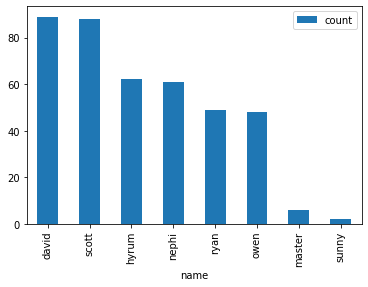

In [2]:
# who submitted the most responses?
names_df = pd.DataFrame({'name':lowernames, 'count':[1]*len(lowernames)}).groupby('name').sum().sort_values(by='count', ascending=False)

names_df[names_df['count'] > 1].plot(kind="bar")

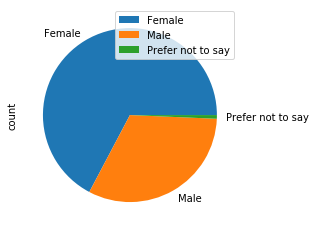

In [3]:
pd.DataFrame({'gender':df[keys[2]], 'count':[1]*len(lowernames)}).groupby('gender').sum().plot.pie(y='count')


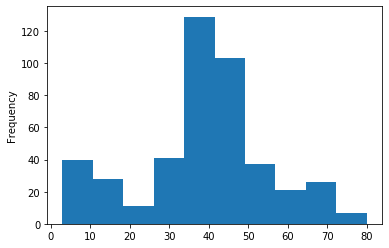

In [4]:
df['your age'].plot.hist()


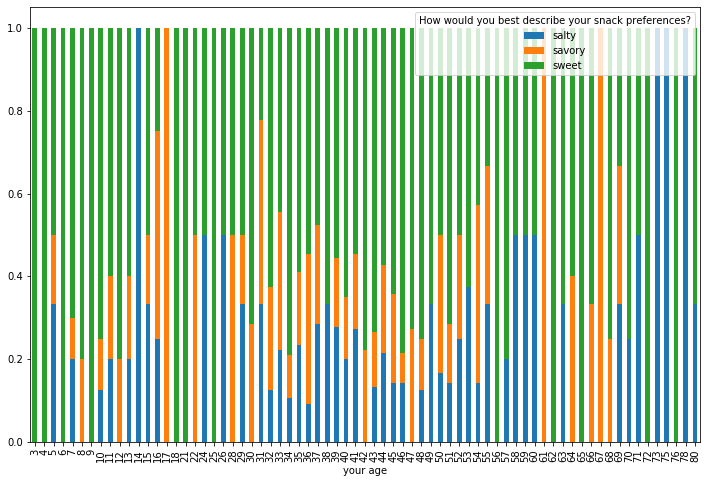

In [28]:
# df.plot.scatter(x=keys[3], y=keys[4])
df2 = df[ [keys[3], keys[4]] ].groupby([keys[3], keys[4]])[keys[3]].count().unstack(keys[4]).fillna(0)
df2 = df2.div(df2.sum(axis=1), axis=0).fillna(0)
df2.plot(kind='bar', stacked=True, figsize=(12,8))

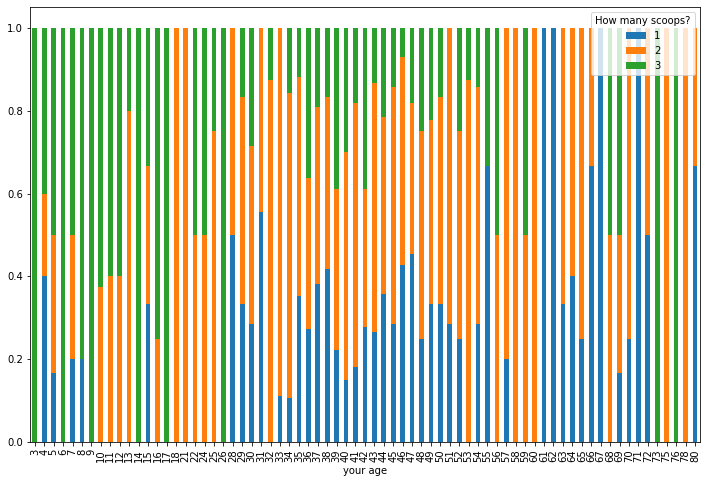

In [29]:
# df.plot.scatter(x=keys[3], y=keys[-1])
df2 = df[ [keys[3], keys[-1]] ].groupby([keys[3], keys[-1]])[keys[3]].count().unstack(keys[-1]).fillna(0)
df2 = df2.div(df2.sum(axis=1), axis=0).fillna(0)
df2.plot(kind='bar', stacked=True, figsize=(12,8))

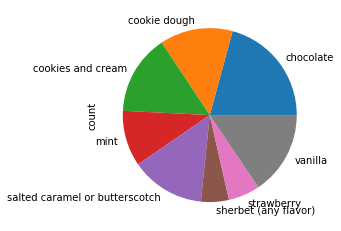

In [7]:
pd.DataFrame({'ice cream':df[keys[5]], 'count':[1]*len(lowernames)}).groupby('ice cream').sum().plot.pie(y='count', legend=False, title=False)

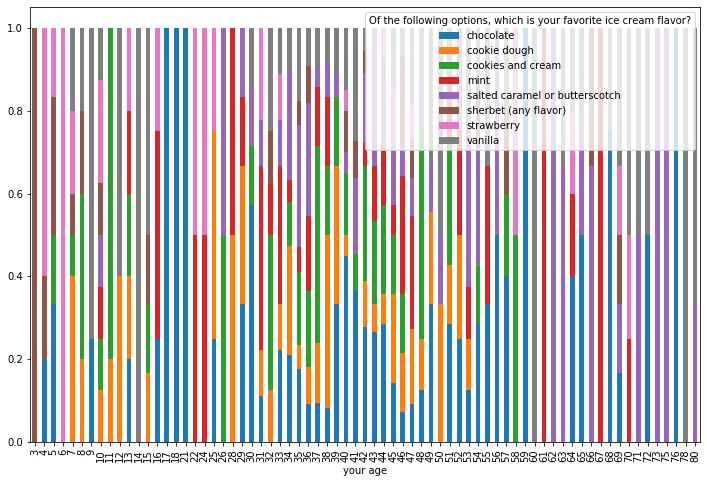

In [30]:
# df.plot.scatter(x=keys[3], y=keys[-4])
df2 = df[ [keys[3], keys[-4]] ].groupby([keys[3], keys[-4]])[keys[3]].count().unstack(keys[-4]).fillna(0)
df2 = df2.div(df2.sum(axis=1), axis=0).fillna(0)
df2.plot(kind='bar', stacked=True, figsize=(12,8))